# Mapa autoorganizável - Vinhos

Base de dados - https://archive.ics.uci.edu/dataset/109/wine

## Importando bibliotecas

In [1]:
!pip install -q minisom

In [2]:
# Importacao desta lib para desativar erro no TensorFlow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import minisom 
import pandas as pd
import matplotlib 
import sklearn

In [4]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

## Carregamento base de dados

In [5]:
base = pd.read_csv('wine_quality.csv')
base

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [6]:
base.shape

(178, 14)

## Dividir a base em X - Previsores e Y - Alvo

In [7]:
X = base.iloc[:,0:13].values
y = base.iloc[:,13].values

In [8]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

## Normalização dos dados - escalonamento

In [10]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

## Criação do mapa auto organizável

In [33]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)

In [34]:
som.random_weights_init(X)

In [35]:
som.train_random(data=X,num_iteration=600)

In [36]:
som._weights

array([[[0.36982155, 0.53431167, 0.48951741, 0.50794706, 0.25086684,
         0.6072467 , 0.48963299, 0.5612164 , 0.57344014, 0.11507658,
         0.64148659, 0.61869661, 0.13914883],
        [0.56184021, 0.64315675, 0.48818276, 0.42197553, 0.27917382,
         0.52558654, 0.47315201, 0.30642292, 0.40877832, 0.2426334 ,
         0.34820174, 0.65413117, 0.36264571],
        [0.46485838, 0.45631682, 0.52924871, 0.51410049, 0.33125652,
         0.34308485, 0.30044092, 0.3628832 , 0.28892608, 0.31291096,
         0.24633345, 0.30635903, 0.25114367],
        [0.24711097, 0.22929162, 0.6820656 , 0.73897763, 0.27056065,
         0.37381186, 0.38611608, 0.64713947, 0.36527125, 0.19222595,
         0.43825594, 0.44485619, 0.17306438],
        [0.17702521, 0.14483527, 0.56318886, 0.61143003, 0.21075746,
         0.37837033, 0.3157694 , 0.60295723, 0.35278962, 0.10351265,
         0.75106338, 0.50191452, 0.13556417],
        [0.27904025, 0.15365579, 0.54340842, 0.64068393, 0.14088073,
         0.

In [37]:
som._weights.shape

(8, 8, 13)

In [38]:
som._activation_map

array([[0.59243627, 0.72908498, 0.75475281, 0.7515042 , 0.59736682,
        0.54608328, 0.54345767, 0.91781729],
       [0.7215286 , 0.78956365, 1.00629378, 0.80554368, 0.74506274,
        0.71041496, 0.59955172, 0.85517083],
       [1.25760762, 1.1454884 , 1.11508412, 1.02013792, 0.9119599 ,
        0.74563076, 0.74248287, 0.65824564],
       [1.21861411, 1.26468686, 1.3294804 , 1.23899549, 1.08178558,
        0.88849743, 0.59889311, 0.67502542],
       [1.21758914, 1.07983221, 0.93969167, 0.95960646, 1.02519856,
        0.89808241, 0.6224561 , 0.7333335 ],
       [0.67457544, 0.56278134, 0.71470224, 0.79768336, 0.91663184,
        0.6493237 , 0.53676286, 0.4957012 ],
       [0.43503463, 0.71805846, 0.84703975, 0.95953598, 1.04222188,
        0.8068679 , 0.36915707, 0.5421482 ],
       [0.69296146, 0.66100422, 0.93694195, 0.90913658, 0.96301777,
        0.54955161, 0.22890801, 0.36561691]])

In [39]:
som._activation_map.shape

(8, 8)

In [40]:
q = som.activation_response(X)
q

array([[2., 4., 0., 1., 6., 3., 4., 3.],
       [0., 0., 4., 1., 5., 2., 2., 2.],
       [3., 2., 3., 4., 1., 1., 2., 1.],
       [4., 3., 5., 3., 6., 1., 1., 4.],
       [5., 1., 1., 1., 3., 3., 0., 4.],
       [0., 0., 4., 3., 2., 0., 2., 2.],
       [4., 1., 7., 4., 7., 3., 4., 2.],
       [2., 2., 4., 3., 3., 3., 7., 8.]])

## Visualização dos resultados

In [41]:
som.distance_map()

array([[0.38085896, 0.64193118, 0.41545059, 0.56071506, 0.48815695,
        0.39448135, 0.53411823, 0.32760543],
       [0.58692179, 0.81164879, 0.96271591, 0.79428752, 0.69596074,
        0.68437035, 0.71733385, 0.63630773],
       [0.52496075, 0.66904124, 0.71587814, 0.78142411, 0.65000376,
        0.68570518, 0.84781951, 0.49008141],
       [0.31752126, 0.61641789, 0.82470967, 0.77115089, 0.67845016,
        0.67251775, 0.80818607, 0.48539111],
       [0.56445984, 0.86329994, 0.9377    , 0.93507605, 0.99441133,
        0.9603819 , 0.70304882, 0.52376565],
       [0.60149959, 0.92738632, 0.93907653, 0.98590153, 1.        ,
        0.85591698, 0.98062245, 0.4846091 ],
       [0.52826   , 0.81262462, 0.61198475, 0.60202951, 0.83185212,
        0.9083527 , 0.74925502, 0.46276584],
       [0.3854557 , 0.42123727, 0.45989509, 0.3514025 , 0.34302787,
        0.50752016, 0.45165354, 0.22037767]])

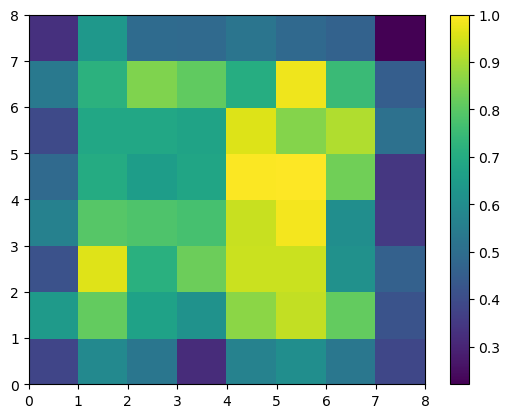

In [42]:
pcolor(som.distance_map().T)
colorbar()

In [43]:
w = som.winner(X[0])
w

(6, 2)

In [44]:
markers = ['o','s','D']
colors = ['r','g','b']

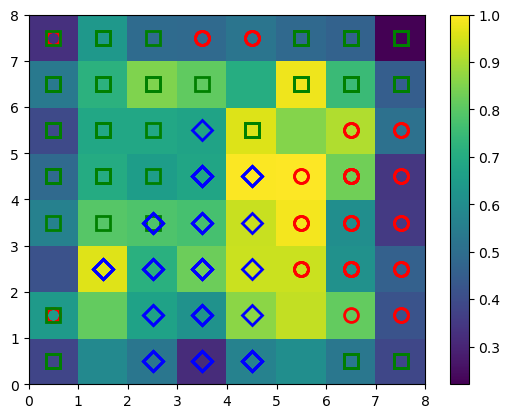

In [45]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i] - 1], markerfacecolor='None', markeredgecolor=colors[y[i]-1], markeredgewidth=2,markersize=10)